In [1]:
pip install efficientnet_pytorch

In [2]:
!pip install albumentations==0.4.6

In [3]:
import albumentations
import sys, os, random
import cv2 as cv
import torch
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime
from efficientnet_pytorch import EfficientNet
from albumentations.pytorch import ToTensorV2
from albumentations import Compose, Resize, Normalize, ShiftScaleRotate

In [4]:
sys.path.append(os.path.abspath('/content/drive/My Drive/Colab Notebooks'))

In [5]:
from Train.Train import Train
from Dataset.DFDC import DFDC
from Utils.Utils import gridshow
from Eval.Eval import Eval

In [6]:
random.seed(323)

In [7]:
TRAINING_DATA_FOLDER = '/content/drive/My Drive/DFDC/Training_Images'
TESTING_DATA_FOLDER = '/content/drive/My Drive/DFDC/Testing_Images'
REAL_FOLDER = 'REAL'
FAKE_FOLDER = 'FAKE'

train_list_real = list(os.listdir(os.path.join(TRAINING_DATA_FOLDER, REAL_FOLDER)))
train_list_fake = list(os.listdir(os.path.join(TRAINING_DATA_FOLDER, FAKE_FOLDER)))

In [8]:
data_transforms = Compose([
        ShiftScaleRotate(shift_limit=0.1, scale_limit=0.2, rotate_limit=10, border_mode=cv.BORDER_CONSTANT, p=0.5),
        Resize(224, 224),
        Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]),
        ToTensorV2()
    ])

data_transforms_test = Compose([
        Resize(224, 224),
        Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]),
        ToTensorV2(),
    ])

In [9]:
train_image_datasets = DFDC(TRAINING_DATA_FOLDER, data_transforms)
test_image_datasets = DFDC(TESTING_DATA_FOLDER, data_transforms_test)

In [10]:
writer = SummaryWriter('/content/drive/MyDrive/Colab Notebooks/Tensorboard_Log/Pytorch_Eff0_Albumentation/'+str(datetime.now()))
device = torch.device("cuda:0")
model = EfficientNet.from_pretrained('efficientnet-b0', num_classes=1)
model = Train(model, train_image_datasets, device, writer)
model, loader = model.run()

Loaded pretrained weights for efficientnet-b0
Epoch 1/10



train Loss: 0.6100 Acc: 0.6695



val Loss: 0.5801 Acc: 0.7000

Epoch 2/10



train Loss: 0.4644 Acc: 0.7985



val Loss: 0.6320 Acc: 0.6561

Epoch 3/10



train Loss: 0.3526 Acc: 0.8533



val Loss: 0.5027 Acc: 0.7634

Epoch 4/10



train Loss: 0.2621 Acc: 0.9057



val Loss: 0.3885 Acc: 0.8366

Epoch 5/10



train Loss: 0.2396 Acc: 0.9166



val Loss: 0.3197 Acc: 0.8659

Epoch 6/10



train Loss: 0.2368 Acc: 0.9099



val Loss: 0.3331 Acc: 0.8537

Epoch 7/10



train Loss: 0.2443 Acc: 0.9148



val Loss: 0.3224 Acc: 0.8659

Epoch 8/10



train Loss: 0.2502 Acc: 0.9026



val Loss: 0.3308 Acc: 0.8707

Epoch 9/10



train Loss: 0.2326 Acc: 0.9124



val Loss: 0.3227 Acc: 0.8707

Epoch 10/10



train Loss: 0.2346 Acc: 0.9130



val Loss: 0.3224 Acc: 0.8805

Training complete in 3m 50s
Best val Acc: 0.880488


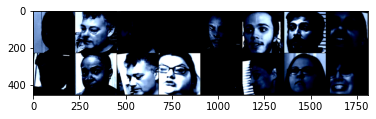

In [11]:
gridshow(loader['val'])

In [12]:
eval = Eval(model,test_image_datasets,device)

In [13]:
eval.run()


F1 Score: 0.8281203374657515
Log Loss: 0.3827813352933542
Confusion Matrix:
[[79 16]
 [17 80]]


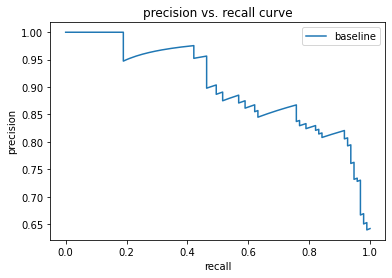

In [14]:
eval.plot_precisionrecall()

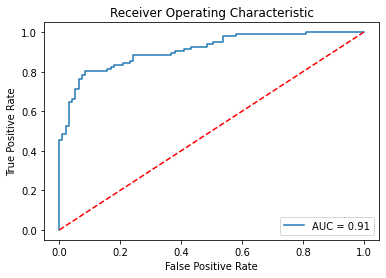

In [15]:
eval.plot_roc()